Como era feito antes?

In [1]:
from pandas_datareader.data import DataReader

In [2]:
data = DataReader('WEGE3.SA', data_source='yahoo', start='2010-1-1')

RemoteDataError: ignored

Verifique que após atualizações da biblioteca essa sintaxe antiga também funciona

E como atualizar?

In [3]:
!pip install -U pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 9.1 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [1]:
import pandas_datareader as pdr

In [2]:
data = pdr.data.get_data_yahoo('BOVA11.SA',start='2019-01-01')

In [3]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-06-30,95.790001,94.260002,94.500000,95.000000,9077017,95.000000
2022-07-01,95.849998,93.809998,94.360001,95.629997,9277937,95.629997
2022-07-04,95.870003,94.750000,94.989998,95.199997,6126222,95.199997
2022-07-05,94.919998,93.059998,94.419998,94.800003,8115343,94.800003
2022-07-06,95.610001,94.580002,94.580002,95.580002,581465,95.580002


In [4]:
data.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [5]:
ordem = ['High', 'Low', 'Open', 'Close', 'Adj Close', 'Volume']

In [6]:
data = data[ordem]

In [13]:
data.head()

,High,Low,Open,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,88.260002,84.349998,84.599998,87.900002,87.900002,5021260
2019-01-03,88.400002,86.800003,87.550003,88.000000,88.000000,4300220
2019-01-04,89.449997,87.629997,88.199997,88.500000,88.500000,2449750
2019-01-07,89.320000,88.059998,88.650002,88.480003,88.480003,2891360
2019-01-08,88.970001,87.870003,88.750000,88.830002,88.830002,3441770


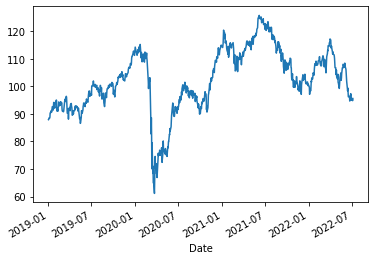

In [14]:
data.Close.plot();

In [8]:
data.shape

(871, 6)

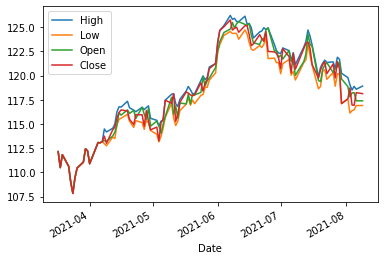

In [9]:
data[['High', 'Low', 'Open', 'Close']].iloc[545:645].plot();

Conceito de Normalização !!

In [10]:
lista = ['WEGE3.SA', '^BVSP', 'MGLU3.SA', 'HCTR11.SA', 'BOVA11.SA']

In [15]:
import pandas as pd

In [16]:
data = pd.DataFrame()

In [17]:
for i in lista:
    data[i] = pdr.data.get_data_yahoo(i,start='2019-01-01').Close

In [18]:
data.head()

,WEGE3.SA,^BVSP,MGLU3.SA,HCTR11.SA,BOVA11.SA
Date,,,,,
2019-01-02,8.990,91012.0,5.812187,NaN,87.900002
2019-01-03,9.195,91564.0,5.750000,NaN,88.000000
2019-01-04,9.300,91841.0,5.575000,NaN,88.500000
2019-01-07,9.155,91699.0,5.661562,NaN,88.480003
2019-01-08,9.080,92032.0,5.615937,NaN,88.830002


In [19]:
data.shape

(871, 5)

In [20]:
#Excluir dados nulos
data_sem_na = data.dropna()

In [21]:
data_sem_na.shape

(742, 5)

In [22]:
data_sem_na

,WEGE3.SA,^BVSP,MGLU3.SA,HCTR11.SA,BOVA11.SA
Date,,,,,
2019-07-11,11.800000,105146.00,7.211562,111.199997,101.209999
2019-07-12,11.545000,103906.00,7.251562,112.000000,100.050003
2019-07-15,11.200000,103803.00,7.207812,111.038002,100.040001
2019-07-16,11.255000,103775.00,7.312500,111.239998,99.900002
2019-07-17,11.265000,103856.00,7.637187,111.239998,100.010002
...,...,...,...,...,...
2022-06-30,26.450001,98542.00,2.340000,113.550003,95.000000
2022-07-01,26.500000,98954.00,2.200000,113.500000,95.629997
2022-07-04,26.490000,98609.00,2.130000,114.190002,95.199997


In [24]:
import matplotlib.pyplot as plt


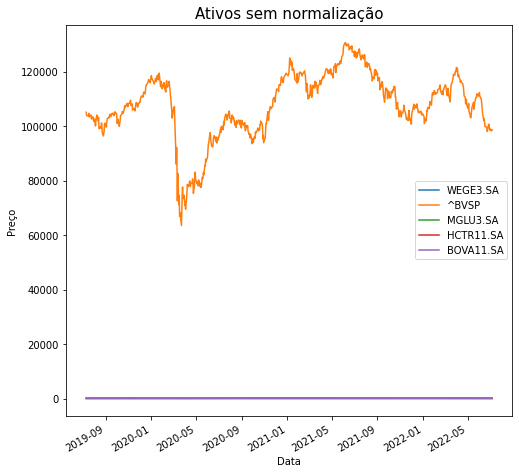

In [27]:
data_sem_na.plot(figsize=[8,8]);
plt.title('Ativos sem normalização',fontsize=15)
plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()

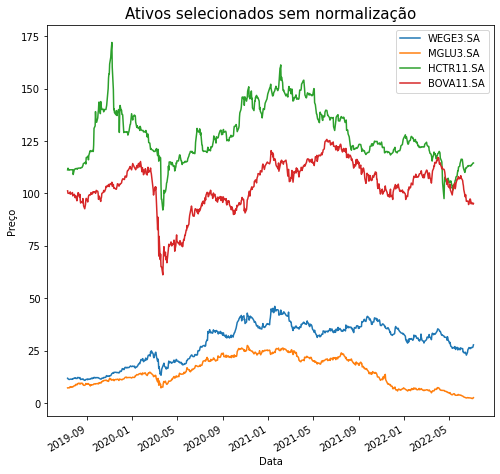

In [29]:
data_sem_na[['WEGE3.SA', 'MGLU3.SA', 'HCTR11.SA', 'BOVA11.SA']].plot(figsize=[8,8]);
plt.title('Ativos selecionados sem normalização',fontsize=15)
plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()

# Introduzindo conceito da normalização

In [30]:
normalizado =  data_sem_na/data_sem_na.iloc[0]

In [33]:
data_sem_na.iloc[0]

WEGE3.SA         11.800000
^BVSP        105146.000000
MGLU3.SA          7.211562
HCTR11.SA       111.199997
BOVA11.SA       101.209999
Name: 2019-07-11 00:00:00, dtype: float64

In [34]:
normalizado

,WEGE3.SA,^BVSP,MGLU3.SA,HCTR11.SA,BOVA11.SA
Date,,,,,
2019-07-11,1.000000,1.000000,1.000000,1.000000,1.000000
2019-07-12,0.978390,0.988207,1.005547,1.007194,0.988539
2019-07-15,0.949153,0.987227,0.999480,0.998543,0.988440
2019-07-16,0.953814,0.986961,1.013997,1.000360,0.987057
2019-07-17,0.954661,0.987731,1.059020,1.000360,0.988143
...,...,...,...,...,...
2022-06-30,2.241525,0.937192,0.324479,1.021133,0.938642
2022-07-01,2.245763,0.941110,0.305066,1.020683,0.944867
2022-07-04,2.244915,0.937829,0.295359,1.026889,0.940618


In [35]:
import matplotlib.pyplot as plt

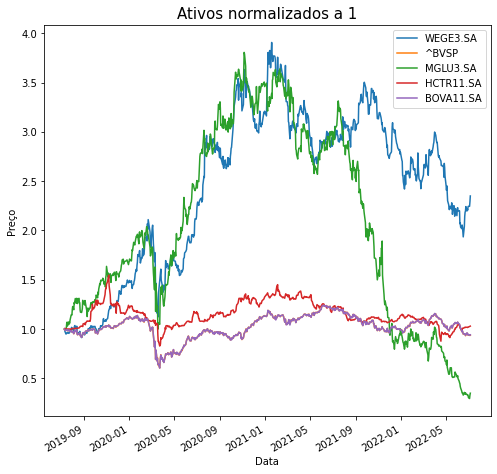

In [36]:
normalizado.plot(figsize=[8,8]);
plt.title('Ativos normalizados a 1',fontsize=15)
plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()